# Contents
   1. [Overview](#Overview)
   2. [Data](#Data)
      1. [Initial Files](#Initial-Files)
      2. [Data Processing](#Data-processing)
   3. [Coding it](#Coding-It)
   3. [Final DataFrame](#Final-DataFrame)
         1. [Normalization](#Normalization)

#### Overview,
"Since Part 1 is all old stuff, you might be interested in seeing if any of the proposed new stuff pans out before diving into the notebooks. I still have to finish writing up Part 1 so in the mean time I'll dump some code, visualizations, and explanations in Pt 2 for now. This page is about getting set up and viewing the financial data that I will as a corpus for the Stock Vector Space Model."

In [1]:
import pandas as pd
import numpy as np
import chants # calling it a util is boring

## Data
I am using 10 year market data on ~ 500 US firms listed on stock exchanges. Each firm is a csv file. For each trading day, several indicators are recorded.
#### Initial Files

In [2]:
pd.read_csv('../data/AAPL.csv')

,Date,Open,High,Low,Close,Volume,Adj Close
0,2012-09-12,666.85,669.90,656.00,669.79,25410600,669.79
1,2012-09-11,665.11,670.10,656.50,660.59,17987400,660.59
2,2012-09-10,680.45,683.29,662.10,662.74,17428500,662.74
3,2012-09-07,678.05,682.48,675.77,680.44,11773800,680.44
4,2012-09-06,673.17,678.29,670.80,676.27,13971300,676.27
...,...,...,...,...,...,...,...
3170,2000-02-07,108.00,114.25,105.94,114.06,15770800,28.39
3171,2000-02-04,103.94,110.00,103.62,108.00,15206800,26.88
3172,2000-02-03,100.31,104.25,100.25,103.31,16977600,25.72
3173,2000-02-02,100.75,102.12,97.00,98.81,16588800,24.60


The dataset is pretty raw, since it's just the emperical data from a a series of trading days. I should point out that most financial datasets are fortunate cases where much of the data wrangling is already done by the recording process. If you want your own stock data to play around with:
    I got mine from Tucker Balcher at
    https://quantsoftware.gatech.edu/ML4T_Software_Setup

Kaggle has a ton as well:
https://www.kaggle.com/borismarjanovic/price-volume-data-for-all-us-stocks-etfs

#### Data processing
- Let's focus on the most commonly used market indicator: Adjusted Close.(https://www.investopedia.com/terms/a/adjusted_closing_price.asp),
- Given the time-series nature of the data, we want to have a datetime index
- We have to be wary that the market is closed often (holidays & weekends)
- We have to be mindful of firms that fall in or out of existence in our timeframe
- We have to be able to instantiate many stock dataframes at once and merge them as needed
#### Coding It

In [6]:
start_date = '2010-01-01'
end_date = '2011-01-01'
dates = pd.date_range(start_date, end_date)
df1 = pd.DataFrame(dates)
df1 = df1.set_index(0)
dfSPY = pd.read_csv('../data/SPY.csv', index_col = "Date", parse_dates=True, usecols=['Date','Adj Close'],na_values=['NA'])
dfSPY = dfSPY.rename(columns={'Adj Close':'SPY'})
df1 = df1.join(dfSPY)
df1 = df1.dropna() 

symbols = ['AAPL', 'GOOG','IBM'] 
for symbol in symbols:
    temp = pd.read_csv(f'../data/{symbol}.csv',index_col='Date',parse_dates=True,usecols=['Date','Adj Close'],na_values='nan')
    temp = temp.rename(columns={'Adj Close':symbol})
    df1 = df1.join(temp)
df1.index.name = 'Date'

### Final Data Frame
This time series of adjusted returns for a set of stocks will be the corpus that informs the stock VSM. Notice, we can eaily adjust the date range and stock considered through the get_data() function.

In [7]:
df1

,SPY,AAPL,GOOG,IBM
Date,,,,
2010-01-04,108.27,213.10,626.75,126.24
2010-01-05,108.56,213.46,623.99,124.71
2010-01-06,108.64,210.07,608.26,123.90
2010-01-07,109.10,209.68,594.10,123.47
2010-01-08,109.46,211.07,602.02,124.71
...,...,...,...,...
2010-12-27,121.90,323.29,602.38,141.17
2010-12-28,122.07,324.08,598.92,141.53
2010-12-29,122.16,323.90,601.00,142.32


<AxesSubplot:xlabel='Date'>

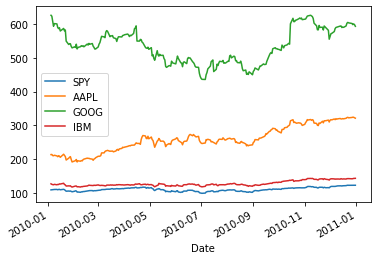

In [8]:
df1.plot()

### Normalization
Last Note:
You could normalize, so the price movement relative to the stocks themselves is clear. This is shown below. There are other times and places to normalize as well. I will intepret the *unnormalized* time series of returns as the corpus and apply normalization later

<AxesSubplot:xlabel='Date'>

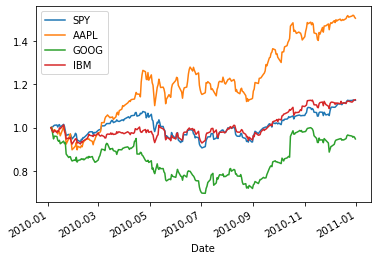

In [11]:
(df1/df1.iloc[0,:]).plot()